In [1]:
%load_ext autoreload
%autoreload 2
import energyflow as ef
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
import os.path as osp
from dataset import  FalconDataset
from edgenet import EdgeNet
from scipy.stats import norm

In [2]:
batch_size = 32
load_model = 'epoch_1860.pt'

In [3]:
device = torch.device('cuda:2')
kwargs = {'num_workers': 1, 'pin_memory': True}
dataset = FalconDataset('')[:64000]
test_loader = DataLoader(dataset,batch_size=batch_size, shuffle=True, drop_last=True, **kwargs)
model = EdgeNet().to(device)

In [4]:
checkpoint = torch.load(load_model, map_location='cpu')
model.load_state_dict(checkpoint)
del checkpoint
torch.cuda.empty_cache()

In [5]:
def preprocess_emd(torch_batch):
    batch_size = torch_batch.batch[-1] + 1
    ret = []
    for batch_idx in range(batch_size):
        ret.append(torch_batch.x[torch_batch.batch == batch_idx][:,:3].cpu().detach().numpy())
    return ret

import torch.nn.functional as F


data = single.to(device)
with torch.no_grad():
    output = model(data)

nodes_list = preprocess_emd(single)
target = torch.from_numpy(ef.emd.emds(nodes_list, R=1.0)).float().to(device)
output_dist = torch.cdist(output, output, p=2.0)

loss = F.mse_loss(output_dist, target)

In [6]:
it = iter(test_loader)
total_loss = []

10460

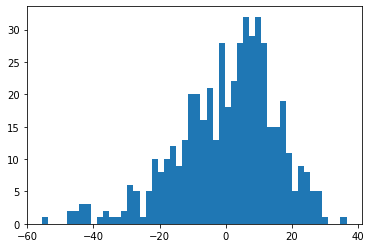

In [32]:
single = next(it)

single

a = preprocess_emd(single)
target = ef.emd.emds(a, R=1.0)
target



data = single.to(device)
with torch.no_grad():
    output = model(data)

output_dist = torch.cdist(output, output, p=2.0)

pred = output_dist.detach().cpu().numpy()

np.set_printoptions(suppress=True)
pred

loss = (pred - target)
loss

loss = np.unique(loss.flatten())
total_loss.append(loss)
plt.hist(loss, bins=50)

tested_events = np.concatenate(total_loss).shape[0]
tested_events

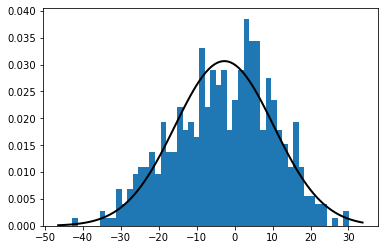

In [8]:

mu, std = norm.fit(np.concatenate(total_loss))
a = plt.hist(np.concatenate(total_loss), bins=50, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) 
plt.plot(x, p, 'k', linewidth=2)
plt.show()

-1.1284728943329276


In [21]:
mu

-2.719978944800351

15.162439621010563



In [22]:
std

13.011042516844352